<a href="https://colab.research.google.com/github/Avisikta-Majumdar/Capstone-Project-Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size="+2" color='#053c96'><b>Project Title :-  Ted Talk Views Prediction
# <font size="+2" color='#053c96'><b>Prediction  :- The views of the videos uploaded on the TEDx website.

### Problem Description 
##### TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.
##### Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.
##### As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.
##### The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

### Data :- data_ted_talks.csv ( containing 4005 ted talk details)

# <b>Project Work flow

* ### <b>Importing Libraries
* ### <b>Loading the Dataset
* ### <b>EDA on features
* ### <b>Feature Engineering
* ### <b>Data Cleaning
* ### <b>Feature selection
* ### <b>Fitting the regression models and HyperParameter Tuning
* ### <b>Comparison of Models
* ### <b>Final selection of the model
* ### <b>Conclusion


## <b>1. Importing Libraries
#### Libraries used in this Project:

Datawrangling : 
* Numpy
* Pandas

For Graphing : 
* Matplotib
* Seaborn 

Machine learning :
* Scikit-Learn
* SK-Opt
* XGBoost
* CatBoost

Miscellaneous :
* Google colab tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sns 
sns.set()

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

##### After that let us fetch the data obviously.

Working without data is like making a cake without bread.

In [ ]:
from google.colab import drive
drive.mount('Drive/')

Drive already mounted at Drive/; to attempt to forcibly remount, call drive.mount("Drive/", force_remount=True).


In [ ]:
# Importing the dataset
working_path = '/content/Drive/MyDrive/AlmaBetter/Team Capstone Projects/Submitted Projects/2.Regression ( Ted Talk Views Prediction ) /data_ted_talks.csv'
ted = pd.read_csv(working_path)

### <b>Data Information


In [ ]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary


In [ ]:
DataInfoAll(ted)

Dataset Shape: (4005, 19)
---------------------------------------------------------------------------


Name  ...                                       Second Value
0          talk_id  ...                                                 92
1            title  ...                    The best stats you've ever seen
2        speaker_1  ...                                       Hans Rosling
3     all_speakers  ...                                {0: 'Hans Rosling'}
4      occupations  ...      {0: ['global health expert; data visionary']}
5   about_speakers  ...  {0: 'In Hans Rosling’s hands, data sings. Glob...
6            views  ...                                           14501685
7    recorded_date  ...                                         2006-02-22
8   published_date  ...                                         2006-06-27
9            event  ...                                            TED2006
10     native_lang  ...                                                 en
11  available_lang  ...  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...
12        comments  ...                                                628
13        duration  ...                                               1190
14          topics  ...  ['Africa', 'Asia', 'Google', 'demo', 'economic...
15   related_talks  ...  {2056: "Own your body's data", 2296: 'A visual...
16             url  ...  https://www.ted.com/talks/hans_rosling_the_bes...
17     description  ...  You've never seen data presented like this. Wi...
18      transcript  ...  About 10 years ago, I took on the task to teac...

[19 rows x 6 columns]

There are missing value in the data By looking at the info of the dataset we can get a rough idea on the numeric and the string columns By looking at the summary of the data we can infer the mean,standard deviation, min and max of the We will be able to get an idea about the outliers here by the percentiles

### ted.head( )

In [ ]:
ted.head(2)

talk_id  ...                                         transcript
0        1  ...  Thank you so much, Chris. And it's truly a gre...
1       92  ...  About 10 years ago, I took on the task to teac...

[2 rows x 19 columns]

* Now we are making the **talk_id** column as index of this DataFrame

setting Talk_id as the index ,so that it can be used for quick indexing , using iloc , instead of needing to do dl.loc[ talk_id == talk_id ]

In [ ]:
ted = ted.set_index('talk_id')

In [ ]:
ted.head(2)

title  ...                                         transcript
talk_id                                   ...                                                   
1            Averting the climate crisis  ...  Thank you so much, Chris. And it's truly a gre...
92       The best stats you've ever seen  ...  About 10 years ago, I took on the task to teac...

[2 rows x 18 columns]

Here most of the columns are categorical variable

### ted.describe( )

In [ ]:
ted.describe()

views     comments     duration
count  4.005000e+03  3350.000000  4005.000000
mean   2.148006e+06   161.997015   724.011236
std    3.451226e+06   268.838922   361.775462
min    0.000000e+00     0.000000    60.000000
25%    8.820690e+05    38.000000   393.000000
50%    1.375508e+06    89.000000   738.000000
75%    2.133110e+06   188.000000   974.000000
max    6.505195e+07  6449.000000  3922.000000

Let's check for 95 , 99 %tile

In [ ]:
ted.describe(percentiles = [.25,.50,.75,.95,.99]).T

count          mean  ...          99%         max
views     4005.0  2.148006e+06  ...  16299833.68  65051954.0
comments  3350.0  1.619970e+02  ...      1038.73      6449.0
duration  4005.0  7.240112e+02  ...      1601.12      3922.0

[3 rows x 10 columns]

### ted.info()

In [ ]:
ted.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 1 to 62794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        3350 non-null   float64
 12  duration        4005 non-null   int64  
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   

## <b>2. Exploratory Data Analysis

#### Let's check **NaN** values

In [ ]:
def NaN(df):
  result = pd.DataFrame({"Feature_Name":df.columns})
  result['Missing'] = df.isnull().sum().values    
  result['Uniques'] = df.nunique().values
  missing=[]
  rows = df.shape[0]
  for col in df.columns:
    missing_val = df[col].isnull().sum()
    missing_percentage = (missing_val/rows)*100
    missing_percentage = round(missing_percentage , 2)
    missing.append(missing_percentage)
  result['%age of missing values'] = missing
  result = result.sort_values( by = '%age of missing values' , ascending = False)
  return result

In [ ]:
NaN(ted)

Feature_Name  Missing  Uniques  %age of missing values
11        comments      655      601                   16.35
3      occupations      522     2049                   13.03
4   about_speakers      503     2977                   12.56
2     all_speakers        4     3306                    0.10
6    recorded_date        1     1334                    0.02
0            title        0     4005                    0.00
16     description        0     4005                    0.00
15             url        0     4005                    0.00
14   related_talks        0     4005                    0.00
13          topics        0     3977                    0.00
12        duration        0     1188                    0.00
9      native_lang        0       12                    0.00
10  available_lang        0     3902                    0.00
1        speaker_1        0     3274                    0.00
8            event        0      459                    0.00
7   published_date        0     2962                    0.00
5            views        0     3996                    0.00
17      transcript        0     4005                    0.00

In [ ]:
ted.isnull().sum()

title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

As you can see these columns*(occupations , about_speakers , comments)* containing most of the NaN values 

#### Let's check duplicate rows

In [ ]:
ted_duplicate_row = ted[ted.duplicated()]
if ted_duplicate_row.shape[0]:
  print(f"There are {ted_duplicate_row.shape[0]} duplicate observations present.")
else:
  print("There is no duplicate value present")

There is no duplicate value present


#### Let's drop the null values 

Here we are dropping rows where NaN values are present

In [ ]:
print(f"Before dropping the shape was {ted.shape}")
ted = ted.dropna(subset=['all_speakers' , 'occupations' , 'about_speakers' , 'recorded_date' , 'comments' ])
print(f"After dropping missing rows now the shape is {ted.shape}")

Before dropping the shape was (4005, 18)
After dropping missing rows now the shape is (3338, 18)


After removing the NaN values let's check is there any NaN value present or not

In [ ]:
NaN(ted).T

0          1   ...            2           17
Feature_Name            title  speaker_1  ...  all_speakers  transcript
Missing                     0          0  ...             0           0
Uniques                  3338       2823  ...          2858        3338
%age of missing values      0          0  ...             0           0

[4 rows x 18 columns]

Thankfully there consists of no null data now.
Now moving forward let's remove all the duplicates present in the dataset.

Before removing those rows we have seen that the dataset is having no duplicate rows .No need to check duplicate values again.

## <b>3. Visualization Part
#### Visualization for numerical parts

In [ ]:
data = ted.copy()

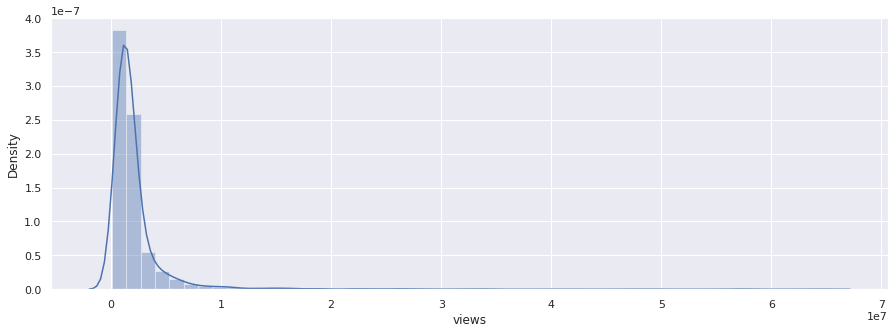

In [ ]:
#visualizing the distplot of views:
plt.figure(figsize=(15,5))
sns.distplot(data['views'])

###### As shown from the graph 'views' feature is positively skewed.

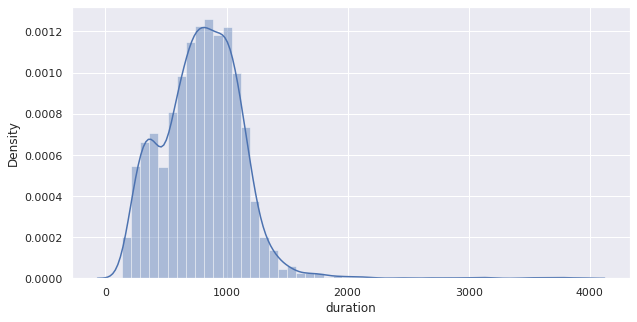

In [ ]:
#visualization of duration
plt.figure(figsize=(10,5))
sns.distplot(data['duration'])

(-100.0, 1500.0, 0.0, 0.005)

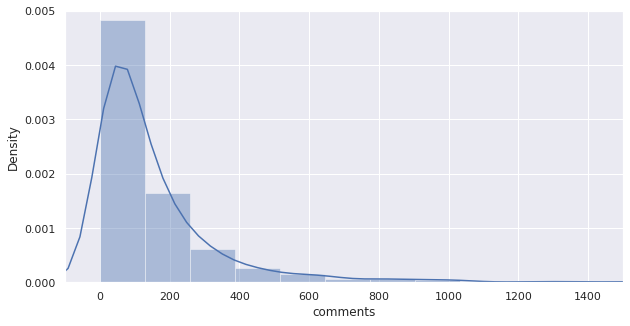

In [ ]:
##visualization of the comments
plt.figure(figsize=(10,5))
sns.distplot(data['comments'])
plt.axis([-100,1500 , 0 , 0.005])

## <b>4.Data Preprocessing and Feature Engineering

Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.

#### Adding a **daily views** column for further analysis:
##### Formatting Datetime type:

In [ ]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-01-22'

In [ ]:
data.head(2)

title  ...                                         transcript
talk_id                                   ...                                                   
1            Averting the climate crisis  ...  Thank you so much, Chris. And it's truly a gre...
92       The best stats you've ever seen  ...  About 10 years ago, I took on the task to teac...

[2 rows x 18 columns]

In [ ]:
data[['published_date' , 'recorded_date']].dtypes

published_date    object
recorded_date     object
dtype: object

In [ ]:
print(f'The datatype of each recorded_date is {type(data.recorded_date.iloc[0])}')
print(f'The datatype of each published_date is {type(data.published_date.iloc[0])}')

The datatype of each recorded_date is <class 'str'>
The datatype of each published_date is <class 'str'>


As you can see the *datatype of **recorded_date** & **published_date**  is in **object** type* ,will **change datatype to *datetime***

In [ ]:
# Recorded date fromat:
data['recorded_date']= pd.to_datetime(data['recorded_date'])
# Formating the published date time:
data['published_date']= pd.to_datetime(data['published_date'])

# Period of day's talk has been published:
last_publishing_date = data['published_date'].max()

data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

In [ ]:
last_publishing_date

Timestamp('2020-04-28 00:00:00')

In [ ]:
print(f'The datatype of each recorded_date is {type(data.recorded_date.iloc[0])}')
print(f'The datatype of each published_date is {type(data.published_date.iloc[0])}')

The datatype of each recorded_date is <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The datatype of each published_date is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
data[['published_date' , 'recorded_date']].dtypes

published_date    datetime64[ns]
recorded_date     datetime64[ns]
dtype: object

In [ ]:
data[['published_date' ,'time_since_published']].iloc[[23,15],:]

published_date time_since_published
talk_id                                    
64          2006-09-06            4983 days
45          2006-08-08            5012 days

In [ ]:
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
data.head(2)

title  ... time_since_published
talk_id                                   ...                     
1            Averting the climate crisis  ...            5054 days
92       The best stats you've ever seen  ...            5054 days

[2 rows x 19 columns]

In [ ]:
data.time_since_published.iloc[0]
a = str(data.time_since_published.iloc[0])
a

'5054 days 00:00:00'

#### <font size="+1" color='#ff3300'>calender.month_abbr(int_value) 
##### This will convert int_value to month like 1--> January ,  6--> June
##### int_value must be in range(1,13)

In [ ]:
import calendar
print([calendar.month_abbr[i] for i in range(1,13)])

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [ ]:
import datetime
#Extracting published month from publish_date column
data['month'] = pd.DatetimeIndex(data['published_date']).month

# Converting month from 'Jan' to 1 like this
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting published year from publish_date column
data['year'] = pd.DatetimeIndex(data['published_date']).year

#Extracting published day from publish_date column
data['day'] = pd.DatetimeIndex(data['published_date']).day



In [ ]:
pd.set_option("max_columns" , None)
pd.set_option("max_rows" , None)
data.head(2)

title     speaker_1         all_speakers  \
talk_id                                                                       
1            Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
92       The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   
92           1190  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   
92       You've never seen data presented like this. Wi...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   
92       About 10 years ago, I took on the task to teac...   

        time_since_published month  year  day  
talk_id                                        
1                  5054 days   Jun  2006   27  
92                 5054 days   Jun  2006   27

In [ ]:
data[['published_date' , 'month' ,'year' ,'day']].iloc[[1,92]]

published_date month  year  day
talk_id                                
92          2006-06-27   Jun  2006   27
110         2007-04-14   Apr  2007   14

#### **Creating daily views** column:

In [ ]:
# Daily views/Talk:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )
data['daily_views'] = data['daily_views'].astype('int64')

In [ ]:
type(data['daily_views'].iloc[0])

numpy.int64

In [ ]:
data['daily_views'].describe(percentiles=[.25,.50,.75,.90,.95,.99])

count      3338.000000
mean       2625.750749
std       11223.928943
min          35.000000
25%         378.000000
50%         882.000000
75%        2000.000000
90%        5550.600000
95%        9378.150000
99%       21409.560000
max      464414.000000
Name: daily_views, dtype: float64

In [ ]:
daily_view = data[[ 'published_date', 'time_since_published' , 'views' , 'daily_views' ]]

daily_view.iloc[[628 , 57 , 2225] , :]

published_date time_since_published    views  daily_views
talk_id                                                          
820         2010-04-07            3674 days  2248059          611
60          2007-02-09            4827 days  1214012          251
2588        2016-09-26            1310 days  2712894         2069

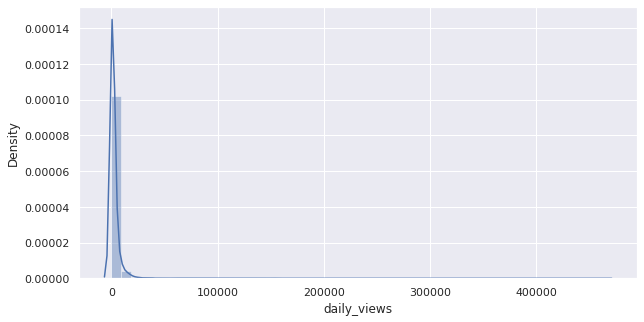

In [ ]:
##visualization of the comments
plt.figure(figsize=(10,5))
sns.distplot(data['daily_views'])

The daily_views is pos. skewed

Let's see the dataset

In [ ]:
data.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views'],
      dtype='object')

In [ ]:
d_= data[['published_date' , 'recorded_date' , 'time_since_published' , 'daily_views']]
d_.head(3)

published_date recorded_date time_since_published  daily_views
talk_id                                                               
1           2006-06-27    2006-02-25            5054 days          697
92          2006-06-27    2006-02-22            5054 days         2868
7           2006-06-27    2006-02-24            5054 days          379

In [ ]:
data.head(1)

title speaker_1    all_speakers  \
talk_id                                                          
1        Averting the climate crisis   Al Gore  {0: 'Al Gore'}   

                       occupations  \
talk_id                              
1        {0: ['climate advocate']}   

                                            about_speakers    views  \
talk_id                                                               
1        {0: 'Nobel Laureate Al Gore focused the world’...  3523392   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   

        time_since_published month  year  day  daily_views  
talk_id                                                     
1                  5054 days   Jun  2006   27          697

### Categarising Variable types:
* data_categorical= data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] <br>
* data_numerical= data[['talk_id','views', 'duration']]

* data_target_variable(Y)  = data[['views']]

In [ ]:
data.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views'],
      dtype='object')

In [ ]:
data_numerical= data[['views', 'duration']]

data_categorical= data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']]

data_target_variable = data[['views']]

### Bivariate Analysis of different features vs. target variable
#### Speaker_1 vs. daily_views:

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

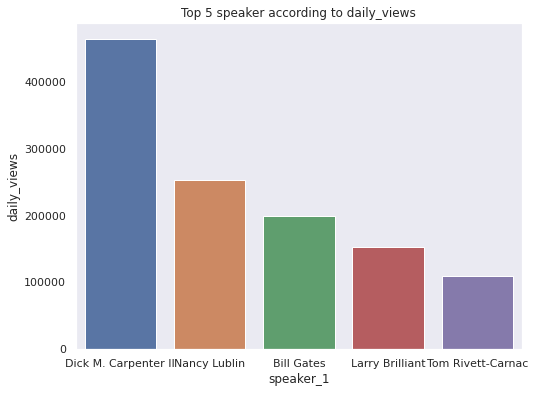

In [ ]:
#top 25 speakers
temp=data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels());
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

### Speaker vs. talks delivered:

Text(0.5, 1.0, 'Top 5 speakers who delivered most talks')

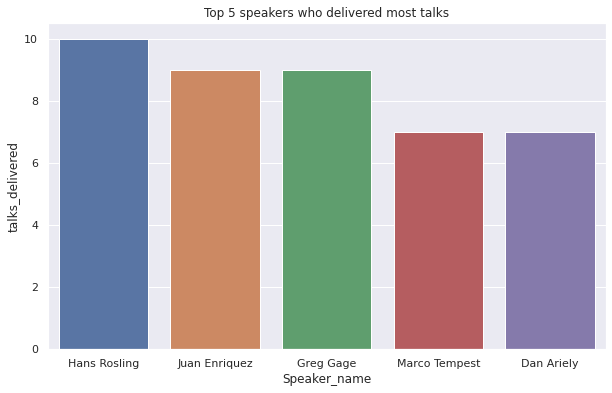

In [ ]:
#Speaker vs. talks delivered:
speaker_count = data['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)
plt.title("Top 5 speakers who delivered most talks")

In [ ]:
speaker_count.head()

speaker_1
Hans Rosling          10
Juan Enriquez          9
Greg Gage              9
Marco Tempest          7
Dan Ariely             7

### speaker vs. duration

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

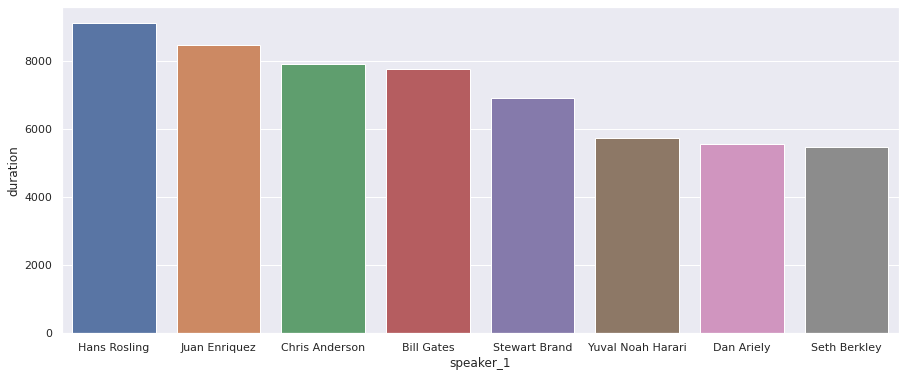

In [ ]:
#speaker vs. duration
temp=data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum'}).sort_values('duration',ascending=False).reset_index()[:8]
# temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels);

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

Text(0.5, 1.0, 'Most popular speaker according to Comments')

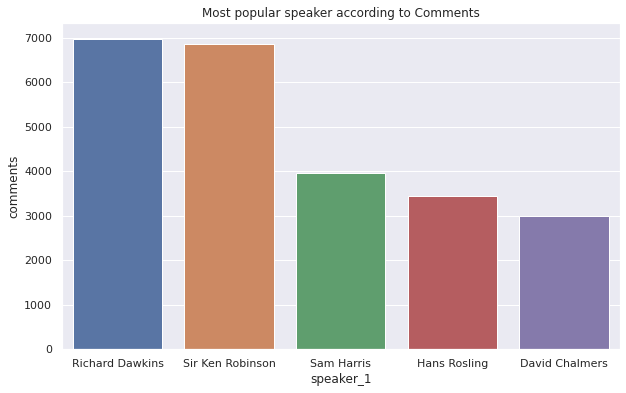

In [ ]:
temp=data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels());
plt.title('Most popular speaker according to Comments')

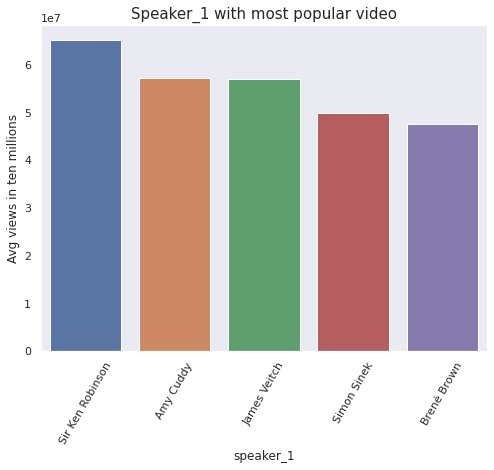

In [ ]:
# Speaker most popular video
temp=data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video', fontsize = 15)
plt.ylabel('Avg views in ten millions')
ax.grid(False)

### Applying target encoding on speaker1

In [ ]:
speaker=data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
data['speaker_1_avg_views']=data['speaker_1'].map(speaker)

In [ ]:
data.head(3)

title     speaker_1         all_speakers  \
talk_id                                                                       
1            Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
92       The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   
7                       Simplicity sells   David Pogue   {0: 'David Pogue'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   
7                        {0: ['technology columnist']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   
7        {0: 'David Pogue is the personal technology co...   1920832   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   
7          2006-02-24     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   
7        ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   
92           1190  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
7            1286  ['computers', 'entertainment', 'interface desi...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   
7        {1725: '10 top time-saving tech tips', 2274: '...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   
7        https://www.ted.com/talks/david_pogue_simplici...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   
92       You've never seen data presented like this. Wi...   
7        New York Times columnist David Pogue takes aim...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   
92       About 10 years ago, I took on the task to teac...   
7        (Music: "The Sound of Silence," Simon & Garfun...   

        time_since_published month  year  day  daily_views  \
talk_id                                                      
1                  5054 days   Jun  2006   27          697   
92                 5054 days   Jun  2006   27         2868   
7                  5054 days   Jun  2006   27          379   

         speaker_1_avg_views  
talk_id                       
1                     699.75  
92                   1099.10  
7                     687.75

#### Let's plot speaker_1_avg_views:


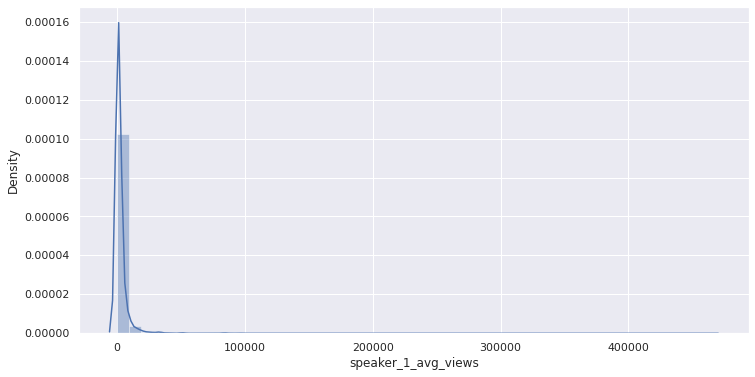

In [ ]:
plt.figure(figsize = (12 , 6))
sns.distplot(data.speaker_1_avg_views)

speaker_1_avg_views is pos. skewed

### Event_wise_avg_views

In [ ]:
event=data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
data['event_wise_avg_views']=data['event'].map(event)

#### Plot event_wise_avg_views

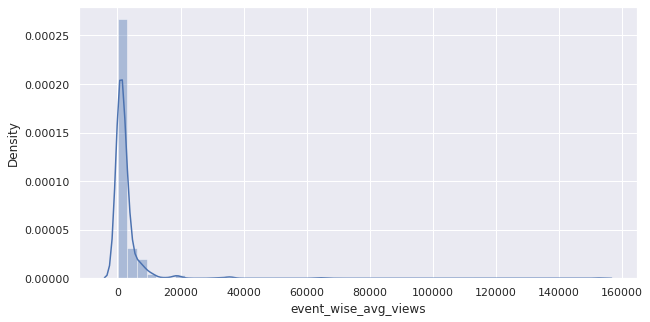

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['event_wise_avg_views'])

In [ ]:
data.reset_index()

talk_id                                              title  \
0           1                        Averting the climate crisis   
1          92                    The best stats you've ever seen   
2           7                                   Simplicity sells   
3          53                                Greening the ghetto   
4          66                        Do schools kill creativity?   
5          49             Behind the design of Seattle's library   
6          86                                  Letting go of God   
7          94  Let's teach religion -- all religion -- in sch...   
8          71                                  A life of purpose   
9          55                      My wish: A global day of film   
10         58                    My wish: Help me stop pandemics   
11         54       My wish: A call for open-source architecture   
12         41                               One Laptop per Child   
13         65   The radical promise of the multi-touch interface   
14         46                      Improvising on piano, aged 14   
15         45                    An 11-year-old's magical violin   
16          2                      Simple designs to save a life   
17         27                 Organic design, inspired by nature   
18         37                             The birth of Wikipedia   
19         25   The birth of the open-source learning revolution   
20         87                                    Nerdcore comedy   
21         21            Meet the founder of the blog revolution   
22         16                          Why we love, why we cheat   
23         64                         Happiness in body and soul   
24         98                  Why the universe seems so strange   
25         47        Chemical scum that dream of distant quasars   
26         20              Choice, happiness and spaghetti sauce   
27         29                  The freakonomics of crack dealing   
28         97                The surprising science of happiness   
29         93                              The paradox of choice   
30         12                 Meet the future of cancer research   
31         39                             A roadmap to end aging   
32         91                   Invest in Africa's own solutions   
33         79                How mobile phones can fight poverty   
34          3                      How to rebuild a broken state   
35         75               Why we should invest in a free press   
36          4               The real future of space exploration   
37         89                   Why did I ski to the North Pole?   
38         56  My wish: Manufactured landscapes and green edu...   
39         57          My wish: Three unusual medical inventions   
40         59                  My wish: Three actions for Africa   
41         22                    Why people believe weird things   
42         67                How juries are fooled by statistics   
43         19                             How technology evolves   
44         38               The accelerating power of technology   
45         23                     Fight injustice with raw video   
46         26                       If I controlled the Internet   
47         10  The killer American diet that's sweeping the p...   
48         70                               8 secrets of success   
49         36                  The hidden world of shadow cities   
50         62       Global priorities bigger than climate change   
51         69                    Dreams from endangered cultures   
52         34                      Photos of endangered cultures   
53         42                         Is this our final century?   
54         68                    Progress is not a zero-sum game   
55         63                         The era of open innovation   
56         61    How the "ghost map" helped end a killer disease   
57         60                           Four American characte

In [ ]:
data.head(2)

title     speaker_1         all_speakers  \
talk_id                                                                       
1            Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
92       The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   
92           1190  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   
92       You've never seen data presented like this. Wi...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   
92       About 10 years ago, I took on the task to teac...   

        time_since_published month  year  day  daily_views  \
talk_id                                                      
1                  5054 days   Jun  2006   27          697   
92                 5054 days   Jun  2006   27         2868   

         speaker_1_avg_views  event_wise_avg_views  
talk_id                                             
1                     699.75             782.47619  
92                   1099.10             782.47619

In [ ]:
data['talk_id'] = data.index

In [ ]:
data['number_of_lang'] = data['available_lang'].apply(lambda x: len(x))

In [ ]:
data.head(5)

title         speaker_1  \
talk_id                                                      
1            Averting the climate crisis           Al Gore   
92       The best stats you've ever seen      Hans Rosling   
7                       Simplicity sells       David Pogue   
53                   Greening the ghetto     Majora Carter   
66           Do schools kill creativity?  Sir Ken Robinson   

                    all_speakers  \
talk_id                            
1                 {0: 'Al Gore'}   
92           {0: 'Hans Rosling'}   
7             {0: 'David Pogue'}   
53          {0: 'Majora Carter'}   
66       {0: 'Sir Ken Robinson'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   
7                        {0: ['technology columnist']}   
53         {0: ['activist for environmental justice']}   
66                         {0: ['author', 'educator']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   
7        {0: 'David Pogue is the personal technology co...   1920832   
53       {0: 'Majora Carter redefined the field of envi...   2664069   
66       {0: "Creativity expert Sir Ken Robinson challe...  65051954   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   
7          2006-02-24     2006-06-27  TED2006          en   
53         2006-02-26     2006-06-27  TED2006          en   
66         2006-02-25     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   
7        ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0   
53       ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...     219.0   
66       ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...    4931.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   
92           1190  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
7            1286  ['computers', 'entertainment', 'interface desi...   
53           1116  ['MacArthur grant', 'activism', 'business', 'c...   
66           1164  ['children', 'creativity', 'culture', 'dance',...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   
7        {1725: '10 top time-saving tech tips', 2274: '...   
53       {1041: '3 stories of local eco-entrepreneurshi...   
66       {865: 'Bring on the learning revolution!', 173...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   
7        https://www.ted.com/talks/david_pogue_simplici...   
53       https://www.ted.com/talks/majora_carter_greeni...   
66       https://www.ted.com/talks/sir_ken_robinson_do_...   

                                               description  \
talk_id                                                      
1  

In [ ]:
data.number_of_lang.describe()

count    3338.000000
mean      168.113841
std        53.184879
min         6.000000
25%       135.000000
50%       165.000000
75%       201.000000
max       454.000000
Name: number_of_lang, dtype: float64

(6.0, 475.0, 0.0, 0.013)

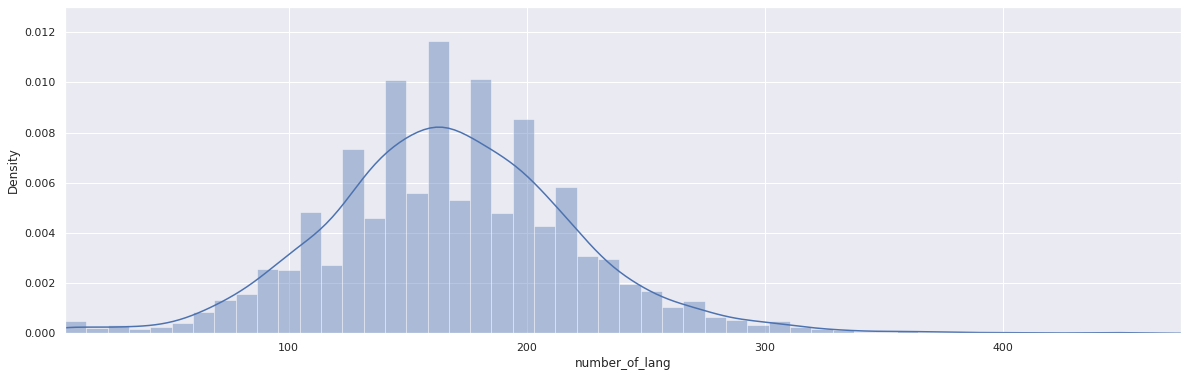

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(data['number_of_lang'])
plt.axis([6,475,0,0.013])

### How many languages available ??

In [ ]:
data.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'talk_id', 'number_of_lang'],
      dtype='object')

In [ ]:
data.native_lang.value_counts().to_frame().T

en  es  fr  hi  ar  ko  pt-br  de  ja  pt  it  zh-cn
native_lang  3306  15   7   2   1   1      1   1   1   1   1      1

Most of the talk is present in *English(en)* language

### Now will look into **topics** column

In [ ]:
data['topics'].head(3)

talk_id
1     ['alternative energy', 'cars', 'climate change...
92    ['Africa', 'Asia', 'Google', 'demo', 'economic...
7     ['computers', 'entertainment', 'interface desi...
Name: topics, dtype: object

In [ ]:
#let's check the datatype 
type(data['topics'].iloc[0])

str

In [ ]:
def convert_str_to_list_or_dict(data):
  return eval(data)

In [ ]:
ted.loc[~ted['topics'].isna() , 'topics'] = ted.loc[~ted['topics'].isna() , 'topics'].apply(convert_str_to_list_or_dict)

In [ ]:
ted.topics.head(3)

talk_id
1     [alternative energy, cars, climate change, cul...
92    [Africa, Asia, Google, demo, economics, global...
7     [computers, entertainment, interface design, m...
Name: topics, dtype: object

In [ ]:
#let's check the datatype again
type(data['topics'].iloc[0])

str

In [ ]:
data['No_of_topics'] = data.topics.apply(lambda x: len(eval(x)))

In [ ]:
data.head(2)

title     speaker_1         all_speakers  \
talk_id                                                                       
1            Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
92       The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   

         duration                                             topics  \
talk_id                                                                
1             977  ['alternative energy', 'cars', 'climate change...   
92           1190  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   
92       You've never seen data presented like this. Wi...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   
92       About 10 years ago, I took on the task to teac...   

        time_since_published month  year  day  daily_views  \
talk_id                                                      
1                  5054 days   Jun  2006   27          697   
92                 5054 days   Jun  2006   27         2868   

         speaker_1_avg_views  event_wise_avg_views  talk_id  number_of_lang  \
talk_id                                                                       
1                     699.75             782.47619        1             270   
92                   1099.10             782.47619       92             303   

         No_of_topics  
talk_id                
1                   9  
92                 11

### Density plot of No_of_topics

Text(0.5, 1.0, 'Density plot for no_of_topics per talk')

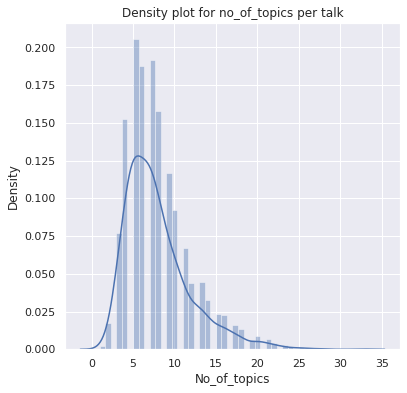

In [ ]:
plt.figure( figsize = (6 , 6))
sns.distplot(data['No_of_topics'])
plt.title("Density plot for no_of_topics per talk")

### Unique_topics

In [ ]:
data.topics.head()

talk_id
1     ['alternative energy', 'cars', 'climate change...
92    ['Africa', 'Asia', 'Google', 'demo', 'economic...
7     ['computers', 'entertainment', 'interface desi...
53    ['MacArthur grant', 'activism', 'business', 'c...
66    ['children', 'creativity', 'culture', 'dance',...
Name: topics, dtype: object

In [ ]:
data.topics = data.topics.apply(lambda x: x.lower())

In [ ]:
data.topics.head()

talk_id
1     ['alternative energy', 'cars', 'climate change...
92    ['africa', 'asia', 'google', 'demo', 'economic...
7     ['computers', 'entertainment', 'interface desi...
53    ['macarthur grant', 'activism', 'business', 'c...
66    ['children', 'creativity', 'culture', 'dance',...
Name: topics, dtype: object

### Stroing all the *unique_topics*

In [ ]:
unique_topics = []
for list_of_topics in data.topics.values:
  list_of_topics = eval(list_of_topics)
  for topic in list_of_topics:
    topic = topic.lower()
    if topic not in unique_topics:
      unique_topics.append(topic)
    
unique_topics.sort()

In [ ]:
len(unique_topics)

449

In [ ]:
for topic in unique_topics:
  print(topic , end=', ')

3d printing, activism, addiction, adventure, advertising, africa, aging, agriculture, ai, aids, aircraft, algorithm, alternative energy, alzheimer's, ancient world, animals, animation, antarctica, anthropocene, anthropology, ants, apes, archaeology, architecture, art, arts, asia, asteroid, astrobiology, astronomy, atheism, audacious project, augmented reality, autism, autism spectrum disorder, bacteria, beauty, bees, behavioral economics, best of the web, big bang, big problems, biodiversity, bioethics, biology, biomechanics, biomimicry, bionics, biosphere, biotech, birds, blindness, blockchain, body language, books, botany, brain, brand, brazil, buddhism, bullying, business, cancer, capitalism, cars, cello, charter for compassion, chemistry, children, china, choice, christianity, cities, climate change, cloud, code, cognitive science, collaboration, comedy, communication, community, compassion, complexity, composing, computers, conducting, consciousness, conservation, consumerism, coo

In [ ]:
data.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'talk_id', 'number_of_lang', 'No_of_topics'],
      dtype='object')

In [ ]:
data['topics'].iloc[0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:
data[['topics' , 'No_of_topics']].head(1)

topics  No_of_topics
talk_id                                                                 
1        ['alternative energy', 'cars', 'climate change...             9

#### Fetching the avg views w.r.t each topic in another dictionary *unique_topics_avg_view_dict*

In [ ]:
for topic in unique_topics:
  print(topic , end=', ')

3d printing, activism, addiction, adventure, advertising, africa, aging, agriculture, ai, aids, aircraft, algorithm, alternative energy, alzheimer's, ancient world, animals, animation, antarctica, anthropocene, anthropology, ants, apes, archaeology, architecture, art, arts, asia, asteroid, astrobiology, astronomy, atheism, audacious project, augmented reality, autism, autism spectrum disorder, bacteria, beauty, bees, behavioral economics, best of the web, big bang, big problems, biodiversity, bioethics, biology, biomechanics, biomimicry, bionics, biosphere, biotech, birds, blindness, blockchain, body language, books, botany, brain, brand, brazil, buddhism, bullying, business, cancer, capitalism, cars, cello, charter for compassion, chemistry, children, china, choice, christianity, cities, climate change, cloud, code, cognitive science, collaboration, comedy, communication, community, compassion, complexity, composing, computers, conducting, consciousness, conservation, consumerism, coo

In [ ]:
data[['topics' , 'daily_views']].head()

topics  daily_views
talk_id                                                                
1        ['alternative energy', 'cars', 'climate change...          697
92       ['africa', 'asia', 'google', 'demo', 'economic...         2868
7        ['computers', 'entertainment', 'interface desi...          379
53       ['macarthur grant', 'activism', 'business', 'c...          527
66       ['children', 'creativity', 'culture', 'dance',...        12868

In [ ]:
unique_topics_avg_view_dict={}
for topic in unique_topics:
  total_views =0
  count=0
  i=0
  for list_of_topics in data.topics.values:
    list_of_topics = eval(list_of_topics)
    # print(type(list_of_topics))
    if(topic in list_of_topics):
      total_views +=data['daily_views'].iloc[i]
      count+=1
    i+=1
    if count==0:
      unique_topics_avg_view_dict[topic] = 0
    else:
      unique_topics_avg_view_dict[topic] = total_views//count

In [ ]:
len(unique_topics_avg_view_dict)

449

Rough

In [ ]:
d = pd.DataFrame({"Topic":list(unique_topics_avg_view_dict.keys()) ,
                  "Avg_Views": list(unique_topics_avg_view_dict.values())})
d.sort_values('Avg_Views' , inplace = True)
d.head()
d.shape

(449, 2)

In [ ]:
type(unique_topics_avg_view_dict['self'])

numpy.int64

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(data)):
  temp=0
  list_of_Topics  = eval(data['topics'].iloc[i])
  for One_topic in list_of_Topics:
    temp +=float(unique_topics_avg_view_dict[One_topic])
  
  topics_wise_avg_views.append(temp//len(list_of_Topics))

topics_wise_avg_views_series = pd.Series(topics_wise_avg_views)
data['topics_wise_avg_views'] = topics_wise_avg_views_series.values

Let's use *DataInfoAll*

In [ ]:
DataInfoAll(data)

Dataset Shape: (3338, 29)
---------------------------------------------------------------------------


Name           dtypes  Missing  Uniques  \
0                   title           object        0     3338   
1               speaker_1           object        0     2823   
2            all_speakers           object        0     2858   
3             occupations           object        0     1987   
4          about_speakers           object        0     2860   
5                   views            int64        0     3334   
6           recorded_date   datetime64[ns]        0      874   
7          published_date   datetime64[ns]        0     2936   
8                   event           object        0      428   
9             native_lang           object        0       12   
10         available_lang           object        0     3274   
11               comments          float64        0      601   
12               duration            int64        0     1143   
13                 topics           object        0     3329   
14          related_talks           object        0     3338   
15                    url           object        0     3338   
16            description           object        0     3338   
17             transcript           object        0     3338   
18   time_since_published  timedelta64[ns]        0     2936   
19                  month           object        0       12   
20                   year            int64        0       15   
21                    day            int64        0       31   
22            daily_views            int64        0     2038   
23    speaker_1_avg_views          float64        0     1978   
24   event_wise_avg_views          float64        0      419   
25                talk_id            int64        0     3338   
26         number_of_lang            int64        0      165   
27           No_of_topics            int64        0       29   
28  topics_wise_avg_views          float64        0     1960   

                                          First Value  \
0                         Averting the climate crisis   
1                                             Al Gore   
2                                      {0: 'Al Gore'}   
3                           {0: ['climate advocate']}   
4   {0: 'Nobel Laureate Al Gore focused the world’...   
5                                             3523392   
6                                 2006-02-25 00:00:00   
7                                 2006-06-27 00:00:00   
8                                             TED2006   
9                                                  en   
10  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...   
11                                                272   
12                                                977   
13  ['alternative energy', 'cars', 'climate change...   
14  {243: 'New thinking on the climate crisis', 54...   
15  https://www.ted.com/talks/al_gore_averting_the...   
16  With the same humor and humanity he exuded in ...   
17  Thank you so much, Chris. And it's truly a gre...   
18                                 5054 days 00:00:00   
19                                                Jun   
20                                               2006   
21                                                 27   
22                                                697   
23                                             699.75   
24                                            782.476   
25                                                  1   
26                                                270   
27                                                  9   
28                                               2184   

                                         Second Value  
0                     The best stats you've ever seen  
1                                        Hans Rosling  
2                                 {0: 'Hans Rosling'}  
3       {0: ['global health expert; data visionary']}  
4   {0: 'In Hans Rosling’s hands, data sings. Glob...  
5                                            14501685

## <b> 5. Data Cleaning

#### Removing Outliers from neumerical columns

In [ ]:
data_numeric = data[list(data.describe())]
data_numeric.head()

views  comments  duration time_since_published  year  day  \
talk_id                                                                 
1         3523392     272.0       977            5054 days  2006   27   
92       14501685     628.0      1190            5054 days  2006   27   
7         1920832     124.0      1286            5054 days  2006   27   
53        2664069     219.0      1116            5054 days  2006   27   
66       65051954    4931.0      1164            5054 days  2006   27   

         daily_views  speaker_1_avg_views  event_wise_avg_views  talk_id  \
talk_id                                                                    
1                697               699.75             782.47619        1   
92              2868              1099.10             782.47619       92   
7                379               687.75             782.47619        7   
53               527               453.00             782.47619       53   
66             12868              6456.00             782.47619       66   

         number_of_lang  No_of_topics  topics_wise_avg_views  
talk_id                                                       
1                   270             9                 2184.0  
92                  303            11                 2045.0  
7                   165             9                 1994.0  
53                  219             9                 2133.0  
66                  387             7                 2430.0

In [ ]:
data_numeric.columns

Index(['views', 'comments', 'duration', 'time_since_published', 'year', 'day',
       'daily_views', 'speaker_1_avg_views', 'event_wise_avg_views', 'talk_id',
       'number_of_lang', 'No_of_topics', 'topics_wise_avg_views'],
      dtype='object')

#### *Duration column*

<Figure size 576x576 with 0 Axes>

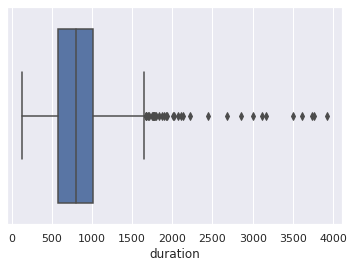

<Figure size 576x576 with 0 Axes>

In [ ]:
# Aplying Outlier treatment on duration
sns.boxplot(data['duration'])
plt.figure( figsize = (8, 8))

Now we have to remove the outliers

In [ ]:
data_duration_iqr=  data['duration'].quantile(0.75)-data['duration'].quantile(0.25)
data['duration']= data['duration'].mask(data['duration']>(data['duration'].quantile(0.75)+1.5*data_duration_iqr), data['duration'].mean())


<Figure size 576x576 with 0 Axes>

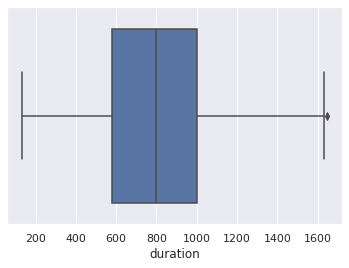

<Figure size 576x576 with 0 Axes>

In [ ]:
# Aplying Outlier treatment on duration
sns.boxplot(data['duration'])
plt.figure( figsize = (8, 8))

#### **No. of Languages column**

<Figure size 576x576 with 0 Axes>

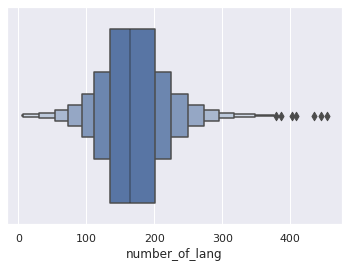

<Figure size 576x576 with 0 Axes>

In [ ]:
# Aplying Outlier treatment on number_of_lang
sns.boxenplot(data['number_of_lang'])
plt.figure( figsize = (8, 8))

In [ ]:
number_of_lang_iqr= (data['number_of_lang'].quantile(0.75))-(data['number_of_lang'].quantile(0.25))
data['number_of_lang']= data['number_of_lang'].mask(data['number_of_lang']>(data['number_of_lang'].quantile(0.75)+1.5*number_of_lang_iqr), data['number_of_lang'].mean())

<Figure size 576x576 with 0 Axes>

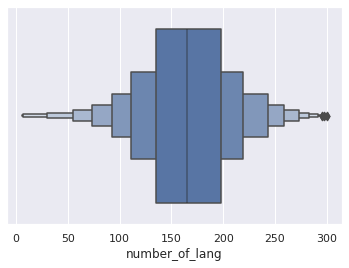

<Figure size 576x576 with 0 Axes>

In [ ]:
# Aplying Outlier treatment on number_of_lang
sns.boxenplot(data['number_of_lang'])
plt.figure( figsize = (8, 8))

Now we don't have any outliers

In [ ]:
temp_data1 = data.copy()

In [ ]:
temp_data1.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'talk_id', 'number_of_lang', 'No_of_topics',
       'topics_wise_avg_views'],
      dtype='object')

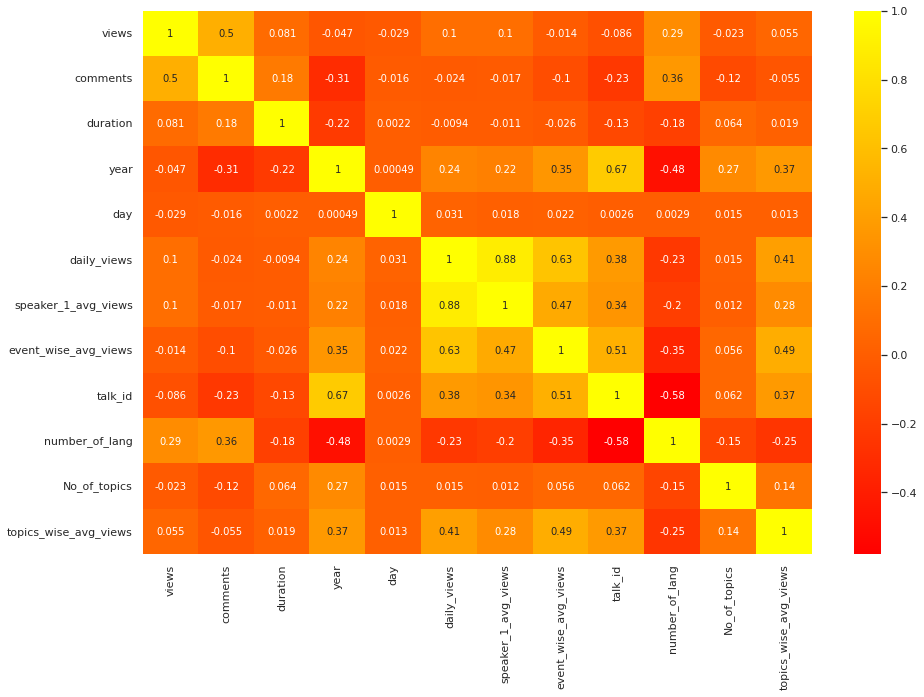

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(temp_data1.corr(), annot= True, cmap= "autumn",ax=ax)

### Checking correlation
* **Positive corr with dependent variable*(daily_views)***<br>
  1.   *speaker_1_avg_views*
  2.   *event_wise_avg_views*



##### Now will remove irrelevant columns

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript']

In [ ]:
df=data.copy()
df.head(2)

title     speaker_1         all_speakers  \
talk_id                                                                       
1            Averting the climate crisis       Al Gore       {0: 'Al Gore'}   
92       The best stats you've ever seen  Hans Rosling  {0: 'Hans Rosling'}   

                                           occupations  \
talk_id                                                  
1                            {0: ['climate advocate']}   
92       {0: ['global health expert; data visionary']}   

                                            about_speakers     views  \
talk_id                                                                
1        {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
92       {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   

        recorded_date published_date    event native_lang  \
talk_id                                                     
1          2006-02-25     2006-06-27  TED2006          en   
92         2006-02-22     2006-06-27  TED2006          en   

                                            available_lang  comments  \
talk_id                                                                
1        ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0   
92       ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0   

         duration                                             topics  \
talk_id                                                                
1           977.0  ['alternative energy', 'cars', 'climate change...   
92         1190.0  ['africa', 'asia', 'google', 'demo', 'economic...   

                                             related_talks  \
talk_id                                                      
1        {243: 'New thinking on the climate crisis', 54...   
92       {2056: "Own your body's data", 2296: 'A visual...   

                                                       url  \
talk_id                                                      
1        https://www.ted.com/talks/al_gore_averting_the...   
92       https://www.ted.com/talks/hans_rosling_the_bes...   

                                               description  \
talk_id                                                      
1        With the same humor and humanity he exuded in ...   
92       You've never seen data presented like this. Wi...   

                                                transcript  \
talk_id                                                      
1        Thank you so much, Chris. And it's truly a gre...   
92       About 10 years ago, I took on the task to teac...   

        time_since_published month  year  day  daily_views  \
talk_id                                                      
1                  5054 days   Jun  2006   27          697   
92                 5054 days   Jun  2006   27         2868   

         speaker_1_avg_views  event_wise_avg_views  talk_id  number_of_lang  \
talk_id                                                                       
1                     699.75             782.47619        1      270.000000   
92                   1099.10             782.47619       92      168.113841   

         No_of_topics  topics_wise_avg_views  
talk_id                                       
1                   9                 2184.0  
92                 11                 2045.0

In [ ]:
df.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'talk_id', 'number_of_lang', 'No_of_topics',
       'topics_wise_avg_views'],
      dtype='object')

In [ ]:
for i in unwanted_features:
  print(i , end=', ')

talk_id, title, speaker_1, all_speakers, occupations, about_speakers, views, recorded_date, published_date, event, native_lang, available_lang, topics, related_talks, url, description, transcript, 

In [ ]:
#dropping unimportant columns from the datasets.
df.drop(columns=unwanted_features,axis = 1,inplace=True)

In [ ]:
df.head(2)

comments  duration time_since_published month  year  day  \
talk_id                                                             
1           272.0     977.0            5054 days   Jun  2006   27   
92          628.0    1190.0            5054 days   Jun  2006   27   

         daily_views  speaker_1_avg_views  event_wise_avg_views  \
talk_id                                                           
1                697               699.75             782.47619   
92              2868              1099.10             782.47619   

         number_of_lang  No_of_topics  topics_wise_avg_views  
talk_id                                                       
1            270.000000             9                 2184.0  
92           168.113841            11                 2045.0

### Let's check correlation matrix again!!

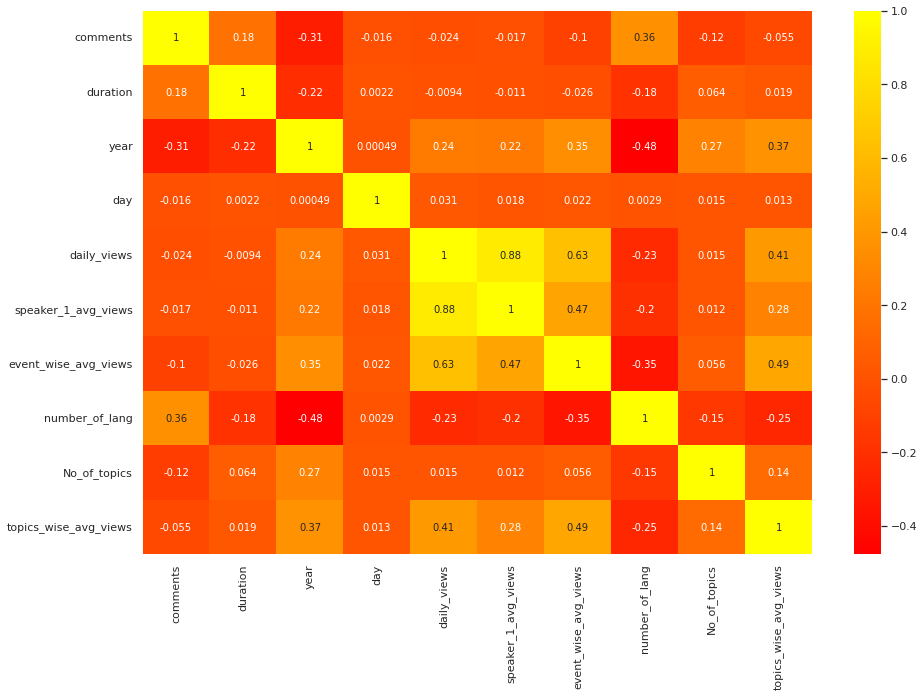

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap= "autumn",ax=ax)

### **Defining the dependent and independent variables.**

In [ ]:
#separating the dependent and independent variables
y=df['daily_views']
X=data[['duration', 'speaker_1_avg_views', 'event_wise_avg_views','number_of_lang', 'No_of_topics', 'topics_wise_avg_views', 'year', 'day']]

In [ ]:
DataInfoAll(X)

Dataset Shape: (3338, 8)
---------------------------------------------------------------------------


Name   dtypes  Missing  Uniques  First Value  Second Value
0               duration  float64        0     1109    977.00000   1190.000000
1    speaker_1_avg_views  float64        0     1978    699.75000   1099.100000
2   event_wise_avg_views  float64        0      419    782.47619    782.476190
3         number_of_lang  float64        0      136    270.00000    168.113841
4           No_of_topics    int64        0       29      9.00000     11.000000
5  topics_wise_avg_views  float64        0     1960   2184.00000   2045.000000
6                   year    int64        0       15   2006.00000   2006.000000
7                    day    int64        0       31     27.00000     27.000000

There is no Null values.

In [ ]:
X2 = X

In [ ]:
X2.head()

duration  speaker_1_avg_views  event_wise_avg_views  number_of_lang  \
talk_id                                                                        
1           977.0               699.75             782.47619      270.000000   
92         1190.0              1099.10             782.47619      168.113841   
7          1286.0               687.75             782.47619      165.000000   
53         1116.0               453.00             782.47619      219.000000   
66         1164.0              6456.00             782.47619      168.113841   

         No_of_topics  topics_wise_avg_views  year  day  
talk_id                                                  
1                   9                 2184.0  2006   27  
92                 11                 2045.0  2006   27  
7                   9                 1994.0  2006   27  
53                  9                 2133.0  2006   27  
66                  7                 2430.0  2006   27

### Let's split dataset into 80:20 ratio

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state = 1)

In [ ]:
print("Shape of x_train ",x_train.shape)
print("Shape of x_test ",x_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test ",x_test.shape)

Shape of x_train  (2503, 8)
Shape of x_test  (835, 8)
Shape of y_train  (2503,)
Shape of y_test  (835, 8)


## **6. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **7. Model Selection**
#### Problem can be identified as  Regression
#### Dataset has very less records


#### Idea is to start selection of models as:

### **1. Linear Regression**
### **2. Lasso**
### **3. Ridge**
### **4. KNeighborsRegressor**
### **5. Random Forest**
### **6. ExtraTreeRegressor**
### **7. GradientBoostingRegressor**
### **8. XGBRegressior**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
# from sklearn.emsemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
ExtraTreeRegressor()

ExtraTreeRegressor()

In [ ]:
#Defining all these models
models = [
          ['Linear Reg.: ', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreeRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]          
        ]

In [ ]:
from sklearn import metrics

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(x_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(x_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(x_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(x_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(x_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(x_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(x_test)))
    model_data.append(curr_model_data)

[13:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

Name    MAE_train     MAE_test  R2_Score_train  \
0                Linear Reg.:   1272.643717  1206.327855        0.859364   
1                      Lasso:   1271.996412  1205.609077        0.859364   
2                      Ridge:   1272.279968  1205.790153        0.859364   
3        KNeighborsRegressor:   1031.186177   910.022036        0.541708   
4                RandomForest    921.407859   838.931752        0.168284   
5         ExtraTreeRegressor :  1528.935278  1371.513772        0.147759   
6  GradientBoostingRegressor:    374.032648   745.559357        0.995173   
7               XGBRegressor:    429.888181   680.397815        0.993294   

   R2_Score_test  RMSE_Score_train  RMSE_Score_test  
0       0.703543       4535.207696      4390.736068  
1       0.703730       4535.208593      4389.354466  
2       0.703867       4535.209433      4388.335700  
3       0.921035       8186.900809      2266.078620  
4       0.335795      11028.995665      6572.153324  
5       0.305696      11164.250260      6719.413163  
6       0.444387        840.176674      6010.942054  
7       0.766717        990.312172      3894.911052

**We choose MAE and not RMSE as the deciding factor of our model selection  because of the following reasons:**

* **RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.**
* **MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.**

* **The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.**

In [ ]:
results_df.sort_values(by=['MAE_train' , 'MAE_test'])

Name    MAE_train     MAE_test  R2_Score_train  \
6  GradientBoostingRegressor:    374.032648   745.559357        0.995173   
7               XGBRegressor:    429.888181   680.397815        0.993294   
4                RandomForest    921.407859   838.931752        0.168284   
3        KNeighborsRegressor:   1031.186177   910.022036        0.541708   
1                      Lasso:   1271.996412  1205.609077        0.859364   
2                      Ridge:   1272.279968  1205.790153        0.859364   
0                Linear Reg.:   1272.643717  1206.327855        0.859364   
5         ExtraTreeRegressor :  1528.935278  1371.513772        0.147759   

   R2_Score_test  RMSE_Score_train  RMSE_Score_test  
6       0.444387        840.176674      6010.942054  
7       0.766717        990.312172      3894.911052  
4       0.335795      11028.995665      6572.153324  
3       0.921035       8186.900809      2266.078620  
1       0.703730       4535.208593      4389.354466  
2       0.703867       4535.209433      4388.335700  
0       0.703543       4535.207696      4390.736068  
5       0.305696      11164.250260      6719.413163

#### Gradient Boosting worked well out of this 8 models but for test data r2 score is very low (0.44),<br> that's why we are going to use **XGBRegressor** as **final model**,

### Let's do *hyperparameter tuning* to imporve the model again

## **8. Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import cross_val_score , ShuffleSplit , GridSearchCV

In [ ]:
FinalModel = XGBRegressor()

In [ ]:
params = {
     'gamma' : [ -0.5, 0, 0.5, 1],
    'learning_rate' :[0.001, 0.01, 0.1, 5,10 ],
    'n_estimators' : [25,50,75,100] ,
    'max_depth' : [3, 5,10]
        }

In [ ]:
gridsearch = GridSearchCV(FinalModel , params , cv=2 , return_train_score=True)

In [ ]:
gridsearch.fit(x_train , y_train )

[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=2, estimator=XGBRegressor(),
             param_grid={'gamma': [-0.5, 0, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 5, 10],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]},
             return_train_score=True)

In [ ]:
print(gridsearch.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
gridsearch_predictions = gridsearch.predict( x_test ) 

In [ ]:
XGBRegressor_with_hyper = []
XGBRegressor_with_hyper.append("XGBRegressor_with_hyper")
XGBRegressor_with_hyper.append(metrics.mean_absolute_error(y_train, gridsearch.predict(x_train)))
XGBRegressor_with_hyper.append(metrics.mean_absolute_error(y_test, gridsearch.predict(x_test)))
XGBRegressor_with_hyper.append(r2_score(y_train,gridsearch.predict(x_train)))
XGBRegressor_with_hyper.append(r2_score(y_test,curr_model.predict(x_test)))
XGBRegressor_with_hyper.append(np.sqrt(mean_squared_error(y_train,gridsearch.predict(x_train))))
XGBRegressor_with_hyper.append(np.sqrt(mean_squared_error(y_test,gridsearch.predict(x_test))))

In [ ]:
XGBRegressor_without_hyper = [ "XGBRegressor_without_hyper" , 429.888181,	680.397815,	0.993294,	0.766717,	990.312172,	3894.911052 ]

In [ ]:
results_df.columns

Index(['Name', 'MAE_train', 'MAE_test', 'R2_Score_train', 'R2_Score_test',
       'RMSE_Score_train', 'RMSE_Score_test'],
      dtype='object')

In [ ]:
Result = pd.DataFrame([ XGBRegressor_without_hyper , XGBRegressor_with_hyper] , columns=results_df.columns)
Result.set_index(Result.Name)
Result

Name   MAE_train    MAE_test  R2_Score_train  \
0  XGBRegressor_without_hyper  429.888181  680.397815        0.993294   
1     XGBRegressor_with_hyper  102.932939  645.449187        0.999718   

   R2_Score_test  RMSE_Score_train  RMSE_Score_test  
0       0.766717        990.312172      3894.911052  
1       0.766717        203.092063      3929.319520

Will use Gradient Boosting without hyperp

### <b>Conclusion</B>
###That's it! We reached the end of our exercise.
###Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

###So far we have modelled on 
* **Lasso Regressor**
* **Ridge Regressor**
* **KNearestNeighbors Regressor**
* **Random Forest Regressor**
* **Extra Tree Regressor**
* **Gradient Boosting Regressor**
* **XGB Regressor**
####<b> NOTES:</b>
* Most of the columns are categorical


###In all of these models our errors have been in the range of 2,00,000 which is around 10% of the average views. We have been able to correctly predict views 90% of the time.
###After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.
###Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.

###Out of all these models RandomForestRegressor is the best performer in terms of MAE.
###In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.

#**Future Work**
###We can do a dynamic regression time series modelling due to the availability of the time features.
###We can use topic modelling to tackle views in each topic separately.